# Estimating $f$-DP Curve for the DP-SGD Mechanism using the PTLR Estimator

## Description

This notebook demonstrates how to use the PTLR estimator API to estimate the entire $f$-DP curve for the DifferentialllyPrivate Stochastic Gradient Descent (DP-SGD) Mechanism.

In [1]:
import numpy as np
import os
import sys
import time
import logging
import matplotlib.pyplot as plt

# Navigate to the parent directory of the project structure
project_dir = os.path.abspath(os.path.join(os.getcwd(), '../..'))
src_dir = os.path.join(project_dir, 'src')
log_dir = os.path.join(project_dir, 'log')
fig_dir = os.path.join(project_dir, 'fig')
os.makedirs(fig_dir, exist_ok=True)
os.makedirs(log_dir, exist_ok=True)
logfile_path = os.path.join(log_dir, 'tradeoff-SGD.log')

# Add the src directory to sys.path
sys.path.append(src_dir)

import mech.toy_DPSGD as DP_SGDModule
from analysis.tradeoff_toyDPSGD import toyDPSGD_compute_tradeoff_curve

In [2]:
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s %(message)s",
    handlers=[
        logging.FileHandler(logfile_path)
        # logging.StreamHandler()
    ]
)


kwargs = DP_SGDModule.generate_params(num_samples = 100000, h=0.1)
estimator = DP_SGDModule.toy_DPSGDPTLREstimator(kwargs)

In [3]:
output = estimator.build(eta_max = 15)

In [4]:
alpha_values_thm = np.linspace(0, 1, 100)
beta_values_thm = toyDPSGD_compute_tradeoff_curve(alpha_values_thm, kwargs)

In [5]:
alpha_values_estimate = output["alpha"]
beta_values_estimate = output["beta"]

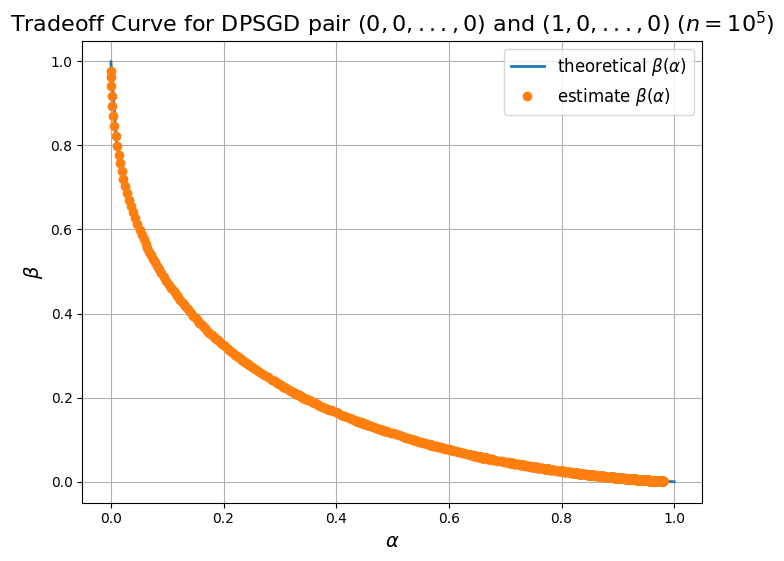

In [6]:
file_name = os.path.join(fig_dir, 'tradeoff_dpsgd_105_ptlr.png')
# Plot the curve
plt.figure(figsize=(8, 6))
plt.plot(alpha_values_thm, beta_values_thm, label=r"theoretical $\beta(\alpha)$", linewidth=2)
plt.plot(alpha_values_estimate, beta_values_estimate, label=r"estimate $\beta(\alpha)$", linestyle='none', marker='o', linewidth=2)
plt.xlabel(r"$\alpha$", fontsize=14)
plt.ylabel(r"$\beta$", fontsize=14)
plt.title(r"Tradeoff Curve for DPSGD pair $(0,0, ..., 0)$ and $(1,0, ..., 0)$ ($n=10^5$)", fontsize=16)
plt.grid(True)
plt.legend(fontsize=12)
plt.savefig(file_name, bbox_inches = 'tight', dpi = 300);
plt.show()